In [94]:
# Create animation from stored radar GIF images.
# Use matplotlib in Jupyter but will have to change it to PyQt4 later
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tempfile
import time
import pytz
import numpy as np
from datetime import datetime


In [95]:
# List of all GIF
import os
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('gif')]
for f in files:
    print f

MUX_20190519_0446_N0R.gif
MUX_20190519_0452_N0R.gif
MUX_20190519_0457_N0R.gif
MUX_20190519_0503_N0R.gif
MUX_20190519_0508_N0R.gif
MUX_20190519_0514_N0R.gif
MUX_20190519_0519_N0R.gif
MUX_20190519_0525_N0R.gif
MUX_20190519_0530_N0R.gif
MUX_20190519_0536_N0R.gif
MUX_20190519_0542_N0R.gif
MUX_20190519_0548_N0R.gif
MUX_20190519_0554_N0R.gif


<IPython.core.display.Javascript object>


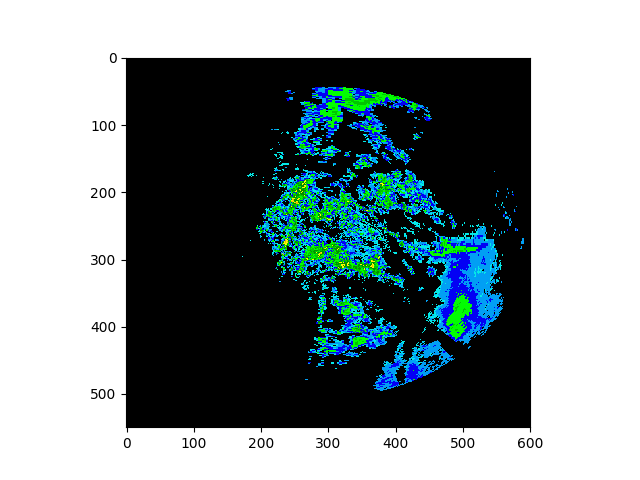

In [96]:
fig,ax = plt.subplots()
#plt.gcf().set_facecolor("red")
ax.patch.set_facecolor("black")
from PIL import Image
ims = []
i = 0
for f in files:
    pil_im = Image.open(f)
    #print 'info: '+str(pil_im.info)
    if i == 0:
        my_pal = pil_im.getpalette
    if True:
        # Create brand new image object from input and it will have white background
        # See: https://stackoverflow.com/questions/10269099/pil-convert-gif-frames-to-jpg
        #pil_im.putpalette(my_pal)
        # 'RGBA' makes it transparent. 'RGB' makes it opague.
        new_im = Image.new("RGBA", pil_im.size)
        new_im.paste(pil_im)
        im = ax.imshow(new_im)
    else:
        # Got this from an example and it makes images with yellow background
        im = ax.imshow(np.asarray(pil_im), animated=True)
    ims.append([im])


Matplotlib documentation suggests that animating a sequence of images should be done with
[ArtistAnimation](https://matplotlib.org/2.1.2/gallery/animation/dynamic_image2.html).

In [97]:
#fig = plt.figure()
#fig.set_facecolor("red")
ani = animation.ArtistAnimation(fig, ims, interval=250, blit=True,
                                repeat_delay=1500)

#ani.save('dynamic_images.mp4')

plt.show()